## Example of Dispersion Engineering LN on Sapphire

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve, brentq
from scipy.constants import pi

#The following hack is for importing a module from the "Modules" folder
import os
cwd = os.getcwd()
os.chdir('..')
import Modules.analysis as analysis
from Modules.materials import *
from Modules.waveguides import *
os.chdir(cwd)

## Index

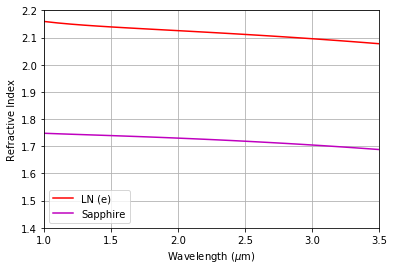

In [2]:
wl = np.arange(1,3.6,0.1)

n0 = 1
nLN = refractive_index('LN_e', wl)
nBOX = refractive_index('Sapphire', wl)
dslab = 1.2-0.8
dridge = 1.2
wridge = 1.55

n_slab = np.zeros(wl.shape)
n_ridge = np.zeros(wl.shape)
neff = np.zeros(wl.shape)
for kw in range(wl.size):
    n_slab[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dslab, wl[kw], mode='TE even', order=0)
    n_ridge[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dridge, wl[kw], mode='TE even', order=0)
    neff[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wl[kw], mode='TM even', order=0)
    
plt.plot(wl, nLN, 'r', label='LN (e)');
plt.plot(wl, nBOX, 'm', label='Sapphire');
plt.grid();
plt.legend();
plt.xlabel('Wavelength ($\mu$m)');
plt.ylabel('Refractive Index');
plt.axis([1,3.5,1.4,2.2]);

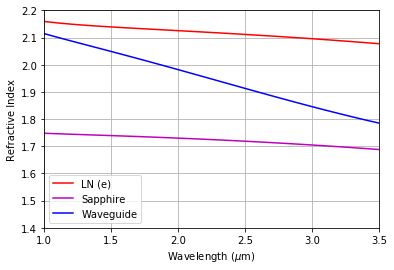

In [3]:
plt.plot(wl, nLN, 'r', label='LN (e)');
plt.plot(wl, nBOX, 'm', label='Sapphire');
plt.plot(wl, neff, 'b', label='Waveguide');
plt.grid();
plt.legend();
plt.xlabel('Wavelength ($\mu$m)');
plt.ylabel('Refractive Index');
plt.axis([1,3.5,1.4,2.2]);

### Poling period

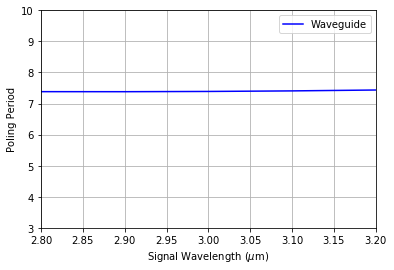

In [4]:
wls = np.arange(2.8,3.21,0.1) #Signal
nLN = refractive_index('LN_e', wls)
nBOX = refractive_index('Sapphire', wls)
n_slab = np.zeros(wls.shape)
n_ridge = np.zeros(wls.shape)
n_s= np.zeros(wls.shape)
n_sb = nLN
for kw in range(wls.size):
    n_slab[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dslab, wls[kw], mode='TE even', order=0)
    n_ridge[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dridge, wls[kw], mode='TE even', order=0)
    n_s[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wls[kw], mode='TM even', order=0)
    
nLN = refractive_index('LN_e', wls/2)
nBOX = refractive_index('Sapphire', wls/2)
n_p= np.zeros(wls.shape)
n_pb = nLN
for kw in range(wls.size):
    n_slab[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dslab, wls[kw]/2, mode='TE even', order=0)
    n_ridge[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dridge, wls[kw]/2, mode='TE even', order=0)
    n_p[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wls[kw]/2, mode='TM even', order=0)

pp = (wls/2)/(n_p-n_s)

plt.plot(wls, pp, 'b', label='Waveguide')
# plt.plot(wls/2, n_p, 'k*', label='Pump');
# plt.plot(wls, n_s, 'ko', label='Signal');
# plt.plot(wl, neff, 'b', label='Waveguide');
plt.grid();
plt.legend();
plt.xlabel('Signal Wavelength ($\mu$m)');
plt.ylabel('Poling Period');
plt.axis([2.8,3.2,3,10]);

### Group velocity

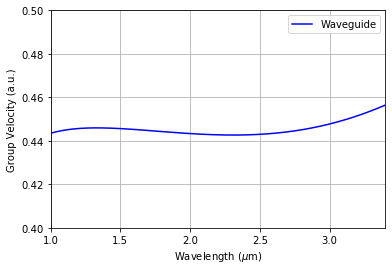

In [5]:
dl = 0.01
wl = np.arange(1.0,3.5,dl)

n0 = 1
nLN = refractive_index('LN_e', wl)
nBOX = refractive_index('Sapphire', wl)
dslab = 1.2-0.8
dridge = 1.2
wridge = 1.55

n_slab = np.zeros(wl.shape)
n_ridge = np.zeros(wl.shape)
neff = np.zeros(wl.shape)
for kw in range(wl.size):
    n_slab[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dslab, wl[kw], mode='TE even', order=0)
    n_ridge[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dridge, wl[kw], mode='TE even', order=0)
    neff[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wl[kw], mode='TM even', order=0)

#Waveguide
dndl_wg = np.gradient(neff, dl)
vg_wg = 1/(neff - wl*dndl_wg)
    
plt.plot(wl, vg_wg, 'b', label='Waveguide');
plt.grid();
plt.legend();
plt.xlabel('Wavelength ($\mu$m)');
plt.ylabel('Group Velocity (a.u.)');
plt.axis([1,3.4,0.4,0.5]);

### GVD

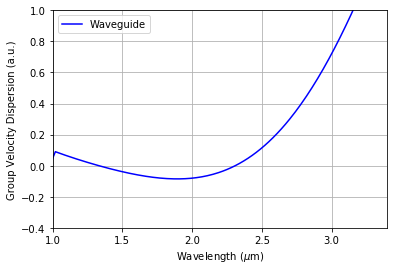

In [6]:
#Waveguide
gvd_wg = -wl**2 * np.gradient(1/vg_wg, dl)

plt.plot(wl, gvd_wg, 'b', label='Waveguide');
plt.grid();
plt.legend();
plt.xlabel('Wavelength ($\mu$m)');
plt.ylabel('Group Velocity Dispersion (a.u.)');
plt.axis([1,3.4,-0.4,1]);

### Vary Geometry

In [7]:
# dslab = 0.33
# dridge = 0.7
# wridge = 1.7

# neff_2 = np.zeros(wl.shape)
# for kw in range(wl.size):
#     n_slab[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dslab, wl[kw], mode='TE even', order=0)
#     n_ridge[kw]= neff_asymmetric_slab(n0, nLN[kw], nBOX[kw], dridge, wl[kw], mode='TE even', order=0)
#     neff_2[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wl[kw], mode='TM even', order=0)

# #Waveguide
# dndl_wg2 = np.gradient(neff_2, dl)
# vg_wg2 = 1/(neff_2 - wl*dndl_wg2)
    
# plt.plot(wl, vg_bulk, 'r', label='Bulk');
# plt.plot(wl, vg_wg, 'b', label='Waveguide');
# plt.plot(wl, vg_wg2, 'k', label='Waveguide2');
# plt.grid();
# plt.legend();
# plt.xlabel('Wavelength ($\mu$m)');
# plt.ylabel('Group Velocity (a.u.)');
# plt.axis([0.6,2.4,0.4,0.5]);

In [8]:
# #Waveguide GVD
# gvd_wg2 = -wl**2 * np.gradient(1/vg_wg2, dl)

# plt.plot(wl, gvd_bulk, 'r', label='Bulk');
# plt.plot(wl, gvd_wg, 'b', label='Waveguide');
# plt.plot(wl, gvd_wg2, 'k', label='Waveguide2');
# plt.grid();
# plt.legend();
# plt.xlabel('Wavelength ($\mu$m)');
# plt.ylabel('Group Velocity Dispersion (a.u.)');
# plt.axis([0.6,2.4,-0.1,0.4]);